#**Se monta el notebook al drive en una carpeta llamada milk_classifier**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/milk_classifier')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/milk_classifier


<img src="https://user-images.githubusercontent.com/82180254/190060896-eb6e554d-5ebb-41fd-a580-f5febe27bc1c.jpeg"  width="800px" height="300px">

# **Milk Classificator** <a name="eje2"></a>

> A cargo de:

Yaire Catalina López Santana 2182061 -
Jeicob Gilmar Restrepo Gómez 2183076





#**Introducción**
####Este proyecto busca poner en práctica algunos de los métodos de clasificación vistos en el curso de Inteligencia Artificial I. Nos basamos en 1 dataset llamado milknew el cual fue tomado de: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality . Se decidió usar los métodos de Gaussian Naive Bayes, Decision Tree Classifier, Random Forest Classifier, Support Vector machine y se hizo una red neuronal.
####La idea fue que con cada método se usaran particiones diferentes y así mismo a cada método variarle un parámetro como por ejemplo, para Decision Tree Clasifier se modificó el max_depht. A continuación encontrará toda la implementación de este proyecto.

#**Cargamos las librerías que se van a usar:**

In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set_theme()
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image

#**Cargamos el dataset**
### se carga el dataset y se reemplazan los valores de la columna Grade de la siguiente manera:
#####-low = 0
#####-medium = 1
#####-high = 2

In [ ]:
d = pd.read_csv("data/milknew.csv")
d.Grade.replace({'low':0,'medium':1,'high':2},inplace = True)
print(d.shape)
X = d.values[:,:-1]
y = d.values[:,-1]
print(X.shape, y.shape)
d.head()

(1059, 8)
(1059, 7) (1059,)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


#**Pre-procesamiento**
 
#####se hace el pre-procesamiento con 80% de los datos para training y el 20% para el testing


In [ ]:
X_train20, X_test20, y_train20, y_test20 = train_test_split(X, y, test_size=0.2, random_state=21)

#####Para comparar los métodos con tres tipos de particionamientos procedemos a hacer el mismo pre-procesamiento para particiones 70-30 y 60-40

In [ ]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
X_train40, X_test40, y_train40, y_test40 = train_test_split(X, y, test_size=0.4, random_state=21)

#**Gaussian Naive Bayes**
##### A continuación entrenamos el modelo con el método de GNB y sacamos una métrica de Accuracy con este estimador que se obtuvo para las particiones 80-20, 70-30 y 60-40, respectivamente

In [ ]:
est1GNB = GaussianNB()
est1GNB.fit(X_train20,y_train20)
y_pred20GNB = est1GNB.predict(X_test20)
print("predicciones = ")
print(y_pred20GNB)
print("ground truth")
print(y_test20)
print("accuracy de Gaussian Naive Bayes con el particionamiento 80-20 = ", accuracy_score(est1GNB.predict(X_test20), y_test20))

predicciones = 
[2. 2. 1. 1. 0. 2. 0. 2. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 2. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 2. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 2. 1. 2. 2. 0. 2. 0. 0. 2. 1. 2. 2. 2. 0. 2. 1.
 2. 1. 2. 1. 1. 0. 1. 0. 2. 2. 1. 2. 2. 1. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 1. 1. 2. 0. 1. 2. 1. 0. 1. 2. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 2. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 2.
 0. 0. 0. 1. 0. 0. 0. 2. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 2.]
ground truth
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 1. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 2. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1.

In [ ]:
est2GNB = GaussianNB()
est2GNB.fit(X_train30,y_train30)
y_pred30GNB = est2GNB.predict(X_test30)
print("predicciones = ")
print(y_pred30GNB)
print("ground truth")
print(y_test30)
print("accuracy de Gaussian Naive Bayes con el particionamiento 70-30 = ", accuracy_score(est2GNB.predict(X_test30), y_test30))

predicciones = 
[2. 2. 1. 1. 0. 2. 0. 2. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 2. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 2. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 2. 1. 2. 2. 0. 2. 0. 0. 2. 1. 2. 2. 2. 0. 2. 1.
 2. 1. 2. 1. 1. 0. 1. 0. 2. 2. 1. 2. 2. 1. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 1. 1. 2. 0. 1. 2. 1. 0. 1. 2. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 2. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 2.
 0. 0. 0. 1. 0. 0. 0. 2. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 2. 1. 1. 2. 1.
 0. 1. 1. 1. 2. 1. 2. 0. 1. 0. 0. 1. 0. 2. 2. 2. 1. 0. 2. 0. 1. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 2. 1.
 0. 1. 0. 2. 1. 0. 1. 1. 0. 2. 1. 1. 0. 0. 0. 1. 2. 1. 0. 1. 2. 1. 2. 2.
 2. 1. 0. 1. 1. 0. 2. 0. 0. 0. 2. 1. 2. 1. 1. 0. 2. 1. 1. 2. 0. 2. 0. 1.
 0. 0. 2. 1. 0. 2.]
ground truth
[2

In [ ]:
est3GNB = GaussianNB()
est3GNB.fit(X_train40,y_train40)
y_pred40GNB = est3GNB.predict(X_test40)
print("predicciones = ")
print(y_pred30GNB)
print("ground truth")
print(y_test40)
print("accuracy de Gaussian Naive Bayes con el particionamiento 60-40 = ", accuracy_score(est3GNB.predict(X_test40), y_test40))

predicciones = 
[2. 2. 1. 1. 0. 2. 0. 2. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 2. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 2. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 2. 1. 2. 2. 0. 2. 0. 0. 2. 1. 2. 2. 2. 0. 2. 1.
 2. 1. 2. 1. 1. 0. 1. 0. 2. 2. 1. 2. 2. 1. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 1. 1. 2. 0. 1. 2. 1. 0. 1. 2. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 2. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 2.
 0. 0. 0. 1. 0. 0. 0. 2. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 2. 1. 1. 2. 1.
 0. 1. 1. 1. 2. 1. 2. 0. 1. 0. 0. 1. 0. 2. 2. 2. 1. 0. 2. 0. 1. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 2. 1.
 0. 1. 0. 2. 1. 0. 1. 1. 0. 2. 1. 1. 0. 0. 0. 1. 2. 1. 0. 1. 2. 1. 2. 2.
 2. 1. 0. 1. 1. 0. 2. 0. 0. 0. 2. 1. 2. 1. 1. 0. 2. 1. 1. 2. 0. 2. 0. 1.
 0. 0. 2. 1. 0. 2.]
ground truth
[2

In [ ]:
print("accuracy de GNB con el particionamiento 80-20 = ", accuracy_score(est1GNB.predict(X_test20), y_test20))
print("accuracy de GNB con el particionamiento 70-30 = ", accuracy_score(est2GNB.predict(X_test30), y_test30))
print("accuracy de GNB con el particionamiento 60-40 = ", accuracy_score(est3GNB.predict(X_test40), y_test40))

accuracy de GNB con el particionamiento 80-20 =  0.9198113207547169
accuracy de GNB con el particionamiento 70-30 =  0.9150943396226415
accuracy de GNB con el particionamiento 60-40 =  0.9221698113207547


#**Decision Tree Classifier**

In [ ]:
#estimador de decision tree con max_depht = 3 y particionamiento 80-20
est1DTC = DecisionTreeClassifier(max_depth=3)
est1DTC.fit(X_train20,y_train20)
print("estimador de decision tree con max_depht = 3 y particionamiento 80-20 = ",accuracy_score(est1DTC.predict(X_test20), y_test20))

estimador de decision tree con max_depht = 3 y particionamiento 80-20 =  0.7311320754716981


In [ ]:
y_pred20DTC = est1DTC.predict(X_test20)
print("predicciones = ")
print(y_pred20DTC)
print("ground truth")
print(y_test20)

predicciones = 
[1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
ground truth
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 1. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 2. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1.

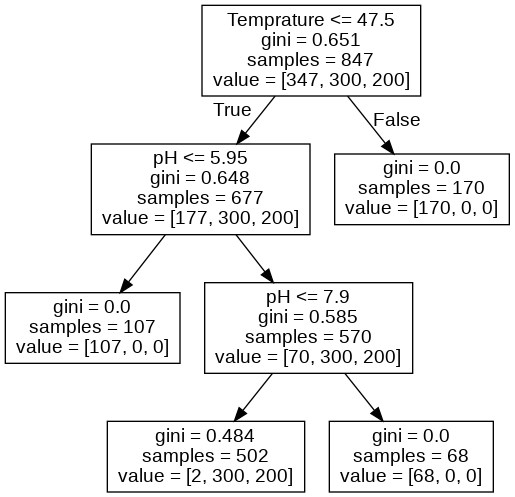

In [ ]:
#creamos el arbol
export_graphviz(est1DTC, out_file='tree_est1DTC.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_est1DTC.dot > tree_est1DTC.png

Image(filename='tree_est1DTC.png') 

In [ ]:
#estimador de decision tree con max_depht = 6 y particionamiento 70-30
est2DTC = DecisionTreeClassifier(max_depth=6)
est2DTC.fit(X_train30,y_train30)
print("accuracy del decision tree con max_depht de 6 y particionamiento 70-30= ",accuracy_score(est2DTC.predict(X_test30), y_test30))

accuracy del decision tree con max_depht de 6 y particionamiento 70-30=  0.8930817610062893


In [ ]:
y_pred30DTC = est2DTC.predict(X_test30)
print("predicciones = ")
print(y_pred30DTC)
print("ground truth")
print(y_test30)

predicciones = 
[2. 2. 1. 2. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 2. 2. 2. 0. 0. 2. 1. 0. 2. 2. 0. 2. 1. 1. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 2. 1. 1. 0. 0. 2. 2. 2. 1. 2. 2. 0. 2. 0. 0. 2. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 2. 2. 2. 1. 2. 0. 0. 0. 0. 1. 0. 0. 0. 2.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 2. 1. 0. 2. 2.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 2. 2. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 2. 1. 2. 0. 1. 2. 1. 0. 0. 2. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 2. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 2.
 0. 0. 0. 1. 0. 0. 0. 2. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 2. 1. 1. 2. 1.
 0. 1. 1. 1. 2. 1. 2. 0. 2. 0. 0. 0. 0. 0. 2. 2. 1. 0. 2. 0. 1. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 1. 2. 2.
 0. 1. 0. 2. 1. 0. 1. 1. 0. 2. 1. 1. 0. 0. 0. 1. 2. 2. 0. 1. 2. 0. 2. 2.
 2. 1. 0. 2. 1. 0. 2. 0. 0. 0. 2. 0. 2. 1. 1. 0. 2. 1. 1. 2. 0. 2. 0. 1.
 0. 0. 2. 1. 0. 2.]
ground truth
[2

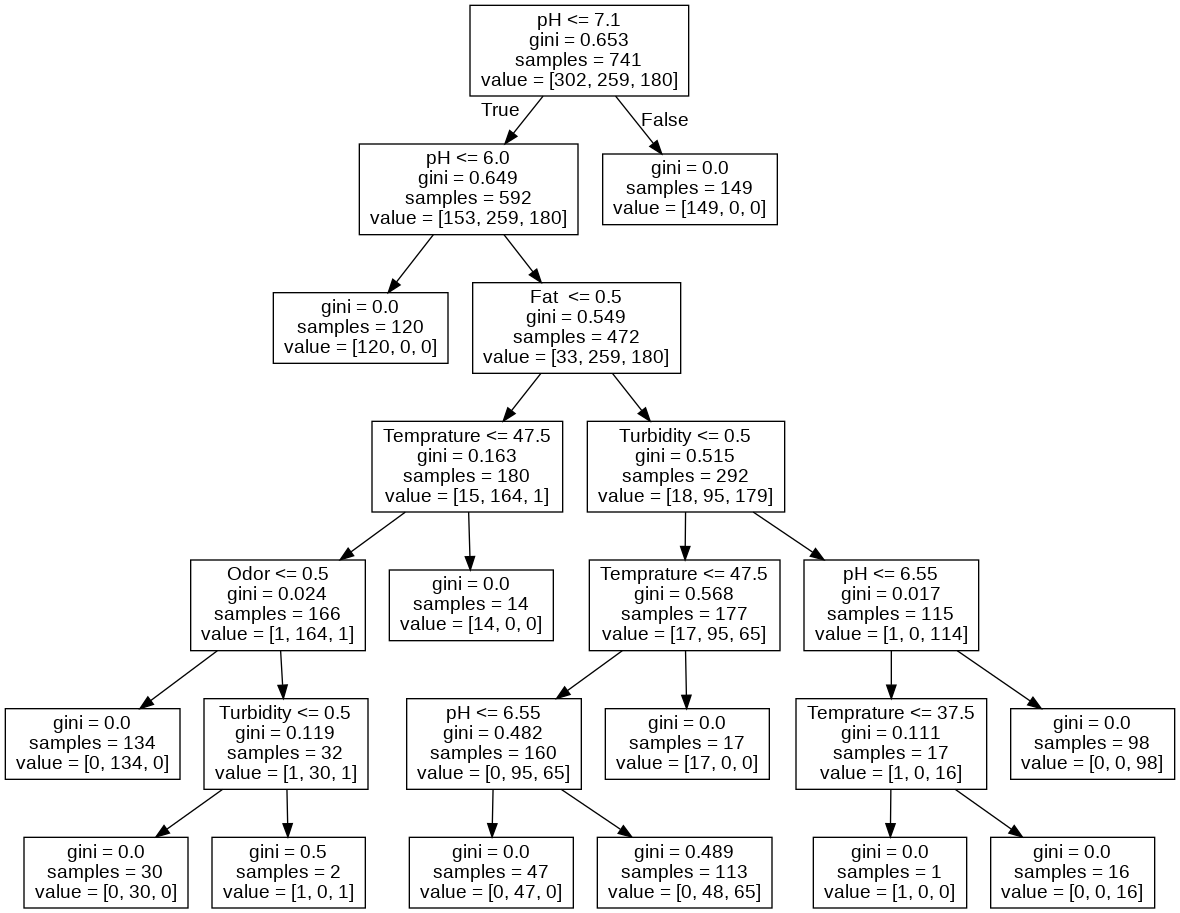

In [ ]:
#creamos el arbol

export_graphviz(est2DTC, out_file='tree_est2DTC.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_est2DTC.dot > tree_est2DTC.png

Image(filename='tree_est2DTC.png') 

In [ ]:
#estimador de decision tree con max_depht = 10 y particionamiento 60-40
est3DTC = DecisionTreeClassifier(max_depth=10)
est3DTC.fit(X_train40,y_train40)
print("accuracy del decision tree con max_depht de 10 y particionamiento 60-40= ",accuracy_score(est2DTC.predict(X_test40), y_test40))

accuracy del decision tree con max_depht de 10 y particionamiento 60-40=  0.9033018867924528


In [ ]:
y_pred40DTC = est3DTC.predict(X_test40)
print("predicciones = ")
print(y_pred40DTC)
print("ground truth")
print(y_test40)

predicciones = 
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 1. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 1. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 1. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 1. 1. 2. 0. 1. 2. 1. 0. 0. 2. 0. 1. 1. 2. 1. 1. 2. 1. 2. 1.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 1. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 2. 1. 2. 0. 1. 0. 0. 0. 0. 0. 2. 2. 1. 0. 2. 0. 1. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 2. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 2. 1. 0. 1. 2. 0. 2. 1.
 2. 1. 0. 1. 1. 0. 1. 0. 0. 0. 2. 0. 2. 1. 1. 0. 2. 1. 1. 2. 0. 1. 0. 1.
 0. 0. 2. 1. 0. 2. 0. 1. 2. 1. 2. 1

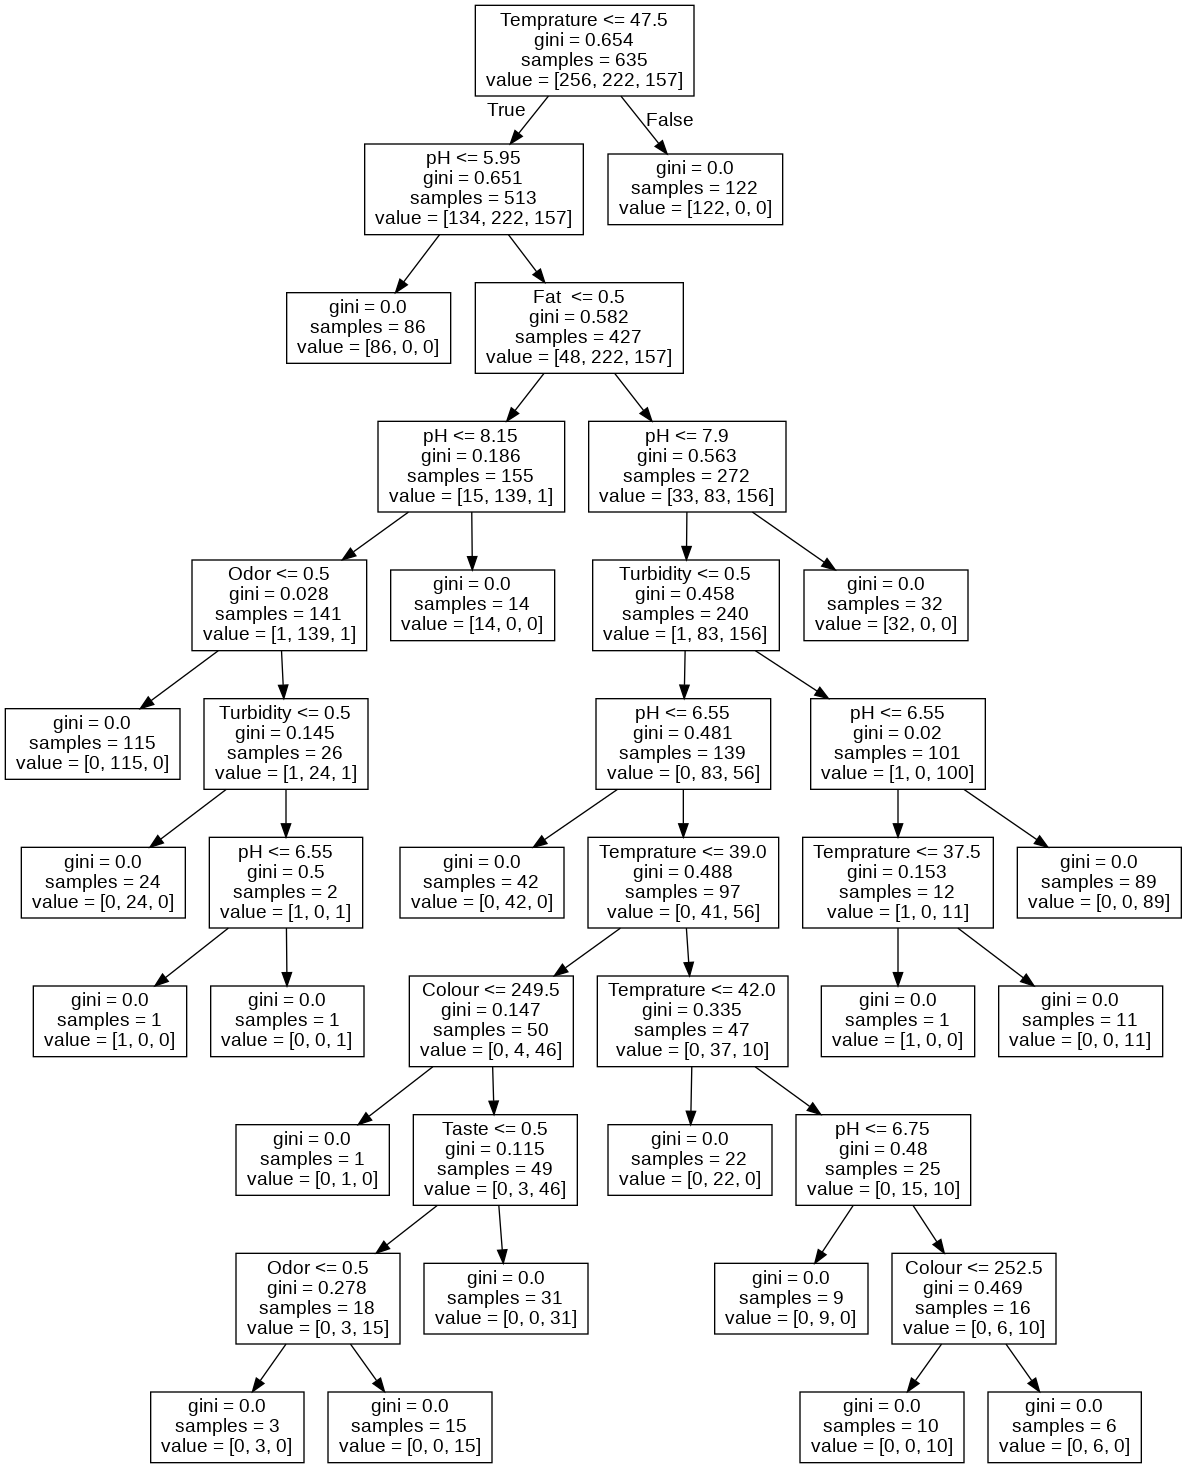

In [ ]:
#creamos el arbol

export_graphviz(est3DTC, out_file='tree_est3DTC.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_est3DTC.dot > tree_est3DTC.png

Image(filename='tree_est3DTC.png') 

####a continuación definimos unas funciones que nos ayudarán a sacar unas métricas en la siguiente celda de código

In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
#cross validation con 10 iteraciones y sus respectivas métricas para el particionamiento 80-20
s = cross_val_score(est1DTC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est1DTC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est1DTC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.774 (+/- 0.06290)
tpr      0.722 (+/- 0.18607)
tnr      0.890 (+/- 0.09318)


In [ ]:
#cross validation con 10 iteraciones y sus respectivas métricas para el particionamiento 80-20
s = cross_val_score(est2DTC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est2DTC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est2DTC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.920 (+/- 0.03017)
tpr      0.779 (+/- 0.07984)
tnr      0.993 (+/- 0.01464)


In [ ]:
#cross validation con 10 iteraciones y sus respectivas métricas para el particionamiento 80-20
s = cross_val_score(est3DTC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est3DTC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est3DTC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

#podemos notar overfiting con las métricas

accuracy 0.995 (+/- 0.00473)
tpr      0.997 (+/- 0.00789)
tnr      0.998 (+/- 0.00667)


In [ ]:
print("estimador de DTC con max_depht = 3 y particionamiento 80-20 = ",accuracy_score(est1DTC.predict(X_test20), y_test20))
print("accuracy del DTC con max_depht = 6 y particionamiento 70-30= ",accuracy_score(est2DTC.predict(X_test30), y_test30))
print("estimador de DTC con max_depht = 10 y particionamiento 60-40 = ",accuracy_score(est3DTC.predict(X_test40), y_test40))

estimador de DTC con max_depht = 3 y particionamiento 80-20 =  0.7311320754716981
accuracy del DTC con max_depht = 6 y particionamiento 70-30=  0.8930817610062893
estimador de DTC con max_depht = 10 y particionamiento 60-40 =  0.9952830188679245


# **Random Forest classifier (RFC)** <a name="eje2"></a>

In [ ]:
#RFC con un particionamiento de 80-20 y un n_estimators de 2
est1RFC = RandomForestClassifier(n_estimators=2)
est1RFC.fit(X_train20,y_train20)
print(accuracy_score(est1RFC.predict(X_test20), y_test20))

0.9905660377358491


In [ ]:
y_pred20RFC = est1RFC.predict(X_test20)
print("predicciones = ")
print(y_pred20RFC)
print("ground truth")
print(y_test20)

predicciones = 
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 1. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 0. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 1. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 1. 1. 2. 0. 1. 2. 1. 0. 0. 2. 0. 1. 1. 2. 1. 1. 2. 1. 2. 1.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 1. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 1.]
ground truth
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 1. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 2. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1.

In [ ]:
s = cross_val_score(est1RFC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est1RFC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est1RFC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.997 (+/- 0.00432)
tpr      0.998 (+/- 0.00698)
tnr      0.995 (+/- 0.01622)


In [ ]:
#RFC con un particionamiento de 70-30 y un n_estimators de 2

est2RFC = RandomForestClassifier(n_estimators=2)
est2RFC.fit(X_train30,y_train30)
print(accuracy_score(est2RFC.predict(X_test30), y_test30))

0.9937106918238994


In [ ]:
y_pred30RFC = est2RFC.predict(X_test30)
print("predicciones = ")
print(y_pred30RFC)
print("ground truth")
print(y_test30)

predicciones = 
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 1. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 1. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 1. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 1. 1. 2. 0. 1. 2. 1. 0. 0. 2. 0. 1. 1. 2. 1. 1. 2. 1. 2. 1.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 1. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 2. 1. 2. 0. 1. 0. 0. 0. 0. 0. 2. 2. 1. 0. 2. 0. 1. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 2. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 2. 1. 0. 1. 2. 0. 2. 1.
 2. 1. 0. 1. 1. 0. 1. 0. 0. 0. 2. 0. 2. 1. 1. 0. 2. 1. 1. 2. 0. 1. 0. 1.
 0. 0. 2. 1. 0. 2.]
ground truth
[2

In [ ]:
s = cross_val_score(est2RFC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est2RFC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est2RFC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.995 (+/- 0.00633)
tpr      1.000 (+/- 0.00000)
tnr      0.998 (+/- 0.00652)


In [ ]:
#RFC con un particionamiento de 60-40 y un n_estimators de 2
est3RFC = RandomForestClassifier(n_estimators=2)
est3RFC.fit(X_train40,y_train40)
print(accuracy_score(est3RFC.predict(X_test40), y_test40))

0.9976415094339622


In [ ]:
y_pred40RFC = est3RFC.predict(X_test40)
print("predicciones = ")
print(y_pred40RFC)
print("ground truth")
print(y_test40)

predicciones = 
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 2. 2. 2. 1. 1. 0.
 1. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 1. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 2. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 1. 2. 1. 1. 0. 1. 0. 2. 2. 2. 0.
 1. 0. 0. 2. 1. 1. 2. 0. 1. 2. 1. 0. 0. 2. 0. 1. 1. 2. 1. 1. 2. 1. 2. 1.
 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 1. 0. 0. 1. 2. 1. 1. 2. 2. 1. 0. 2. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 2. 1. 1. 1. 1.
 0. 1. 1. 1. 2. 1. 2. 0. 1. 0. 0. 0. 0. 0. 2. 2. 1. 0. 2. 0. 1. 0. 2. 0.
 2. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 2. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 2. 1. 0. 1. 2. 0. 2. 1.
 2. 1. 0. 1. 1. 0. 1. 0. 0. 0. 2. 0. 2. 1. 1. 0. 2. 1. 1. 2. 0. 1. 0. 1.
 0. 0. 2. 1. 0. 2. 0. 1. 2. 1. 2. 1

In [ ]:
s = cross_val_score(est3RFC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est3RFC, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est3RFC, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.993 (+/- 0.00737)
tpr      0.994 (+/- 0.01181)
tnr      1.000 (+/- 0.00000)


In [ ]:
print("Accuracy para random_forest 80-20", accuracy_score(est1RFC.predict(X_test20), y_test20))
print("Accuracy para random_forest 70-30", accuracy_score(est2RFC.predict(X_test30), y_test30))
print("Accuracy para random_forest 60-40", accuracy_score(est3RFC.predict(X_test40), y_test40))

Accuracy para random_forest 80-20 0.9905660377358491
Accuracy para random_forest 70-30 0.9937106918238994
Accuracy para random_forest 60-40 0.9976415094339622


# **Support vector machine (SVM)** <a name="eje3"></a>


In [ ]:
#SVM con una partición de 70-30
est1SVM = SVC(kernel='linear')
est1SVM.fit(X_train30,y_train30)
print("accurracy para SVM con kernel linear =",accuracy_score(est1SVM.predict(X_test30), y_test30))

accurracy para SVM con kernel linear = 0.8679245283018868


In [ ]:
y_pred30SVM1 = est1SVM.predict(X_test30)
print("predicciones = ")
print(y_pred30SVM1)
print("ground truth")
print(y_test30)

predicciones = 
[2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0. 2. 2. 0. 1. 1. 0.
 2. 2. 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 1. 2. 1. 1. 0. 0. 0. 2. 1. 0. 1. 0.
 2. 1. 0. 1. 0. 0. 2. 2. 1. 1. 2. 1. 0. 0. 0. 0. 2. 1. 2. 2. 2. 2. 2. 0.
 2. 1. 2. 0. 1. 0. 2. 0. 2. 2. 1. 2. 2. 1. 2. 0. 0. 0. 0. 1. 2. 0. 0. 1.
 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 1. 1. 2. 0. 0. 1. 0. 1. 2. 1. 1. 0. 2. 1.
 1. 2. 1. 1. 0. 0. 0. 0. 0. 2. 2. 1. 1. 2. 0. 1. 2. 0. 1. 0. 2. 2. 2. 0.
 0. 0. 0. 2. 1. 1. 2. 0. 1. 0. 1. 0. 1. 2. 0. 1. 1. 2. 1. 2. 2. 1. 0. 2.
 0. 0. 0. 0. 2. 0. 2. 1. 0. 1. 1. 0. 0. 2. 2. 1. 2. 2. 2. 1. 0. 2. 1. 2.
 0. 0. 0. 1. 0. 0. 0. 2. 0. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0. 2. 0. 1. 1. 1.
 0. 1. 1. 1. 2. 1. 2. 0. 1. 0. 0. 0. 0. 0. 2. 2. 1. 0. 2. 0. 1. 2. 2. 0.
 2. 0. 2. 0. 1. 2. 1. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 2. 0. 2. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 1. 2. 1. 2. 0. 2. 1.
 2. 1. 0. 1. 1. 0. 1. 0. 0. 0. 2. 0. 2. 1. 1. 0. 2. 2. 1. 2. 0. 2. 0. 1.
 0. 0. 2. 1. 0. 2.]
ground truth
[2

In [ ]:
est2SVM = SVC(kernel='poly')
est2SVM.fit(X_train30,y_train30)
print("accurracy para SVM con kernel poly =",accuracy_score(est2SVM.predict(X_test30), y_test30))

accurracy para SVM con kernel poly = 0.5251572327044025


In [ ]:
y_pred30SVM2 = est2SVM.predict(X_test30)
print("predicciones = ")
print(y_pred30SVM2)
print("ground truth")
print(y_test30)

predicciones = 
[1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1.]
ground truth
[2

In [ ]:
est3SVM = SVC(kernel='rbf')
est3SVM.fit(X_train30,y_train30)
print("accurracy para SVM con kernel rbf =",accuracy_score(est3SVM.predict(X_test30), y_test30))

accurracy para SVM con kernel rbf = 0.5534591194968553


In [ ]:
y_pred30SVM3 = est3SVM.predict(X_test30)
print("predicciones = ")
print(y_pred30SVM3)
print("ground truth")
print(y_test30)

predicciones = 
[1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1.]
ground truth
[2

In [ ]:
s = cross_val_score(est1SVM, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est1SVM, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est1SVM, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.877 (+/- 0.02695)
tpr      0.839 (+/- 0.04859)
tnr      0.931 (+/- 0.03237)


In [ ]:
s = cross_val_score(est2SVM, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est2SVM, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est2SVM, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.514 (+/- 0.05424)
tpr      0.923 (+/- 0.04312)
tnr      0.465 (+/- 0.07019)


In [ ]:
s = cross_val_score(est3SVM, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est3SVM, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est3SVM, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.530 (+/- 0.03308)
tpr      0.992 (+/- 0.02400)
tnr      0.433 (+/- 0.08076)


#**Red Neuronal con diferentes parametros**



##Particion 80-20

modelo entrenado con 20 epochs tiene estas metricas: loss=1.0491564273834229 accuracy=0.5754716992378235


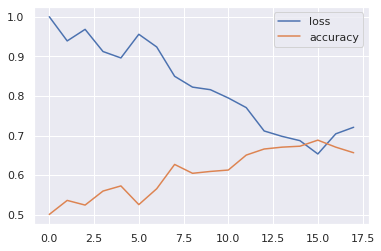

el epoch en el que obtuvo el mayor accuracy es: 17
modelo entrenado con 50 epochs tiene estas metricas: loss=0.6058033108711243 accuracy=0.7169811129570007


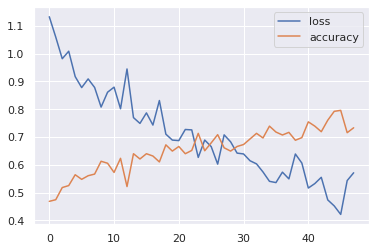

el epoch en el que obtuvo el mayor accuracy es: 47
modelo entrenado con 100 epochs tiene estas metricas: loss=0.24415786564350128 accuracy=0.900943398475647


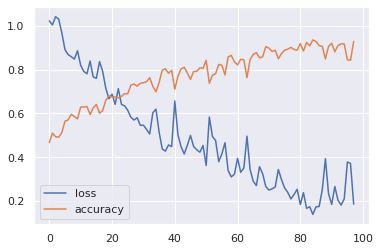

el epoch en el que obtuvo el mayor accuracy es: 86
modelo entrenado con 200 epochs tiene estas metricas: loss=0.15169265866279602 accuracy=0.9198113083839417


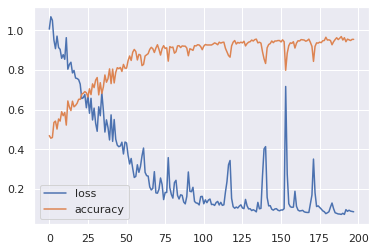

el epoch en el que obtuvo el mayor accuracy es: 191


In [ ]:
from tensorflow.keras.optimizers import Adam

nclasses = len(np.unique(y))

epochs = [20,50,100,200]

for epoch in epochs:
  modelo = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[X_train20.shape[1],]),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(256, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(nclasses, activation=tf.nn.softmax)
      ])
  modelo.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  historial = modelo.fit(X_train20, y_train20, epochs=epoch, batch_size=32,verbose=0)

  scores = modelo.evaluate(X_test20, y_test20,verbose=0)
  print(f"modelo entrenado con {epoch} epochs tiene estas metricas: loss={scores[0]} accuracy={scores[1]}")
  plt.plot(historial.history['loss'][2:], label="loss")
  plt.plot(historial.history['accuracy'][2:], label="accuracy")
  plt.legend()
  plt.show()
  print(f'el epoch en el que obtuvo el mayor accuracy es: {np.argmax(historial.history["accuracy"])}') 

In [ ]:
n = np.random.randint(0,y_test20.shape[0]+1)
print(f'la probabilidad de que la entrada del indice {n} sea cada una de las posibles salidas es: {modelo.predict(X_test20)[n]}')
result = np.argmax(modelo.predict(X_test20), axis=1)
print('(Predicción, Ground truth)')
result[n], y_test20[n]

la probabilidad de que la entrada del indice 152 sea cada una de las posibles salidas es: [1.2308658e-15 1.0000000e+00 6.2018604e-09]
(Predicción, Ground truth)


(1, 1.0)

##Particion 70-30

modelo entrenado con 20 epochs tiene estas metricas: loss=0.9812442660331726 accuracy=0.40566039085388184


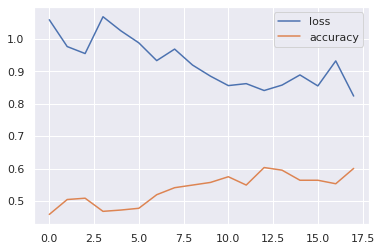

el epoch en el que obtuvo el mayor accuracy es: 14
modelo entrenado con 50 epochs tiene estas metricas: loss=0.5757627487182617 accuracy=0.7169811129570007


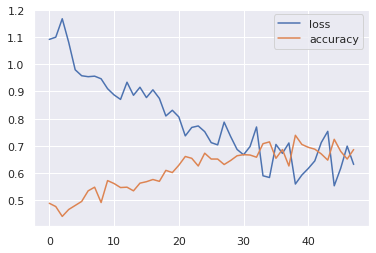

el epoch en el que obtuvo el mayor accuracy es: 40
modelo entrenado con 100 epochs tiene estas metricas: loss=0.17328573763370514 accuracy=0.9150943160057068


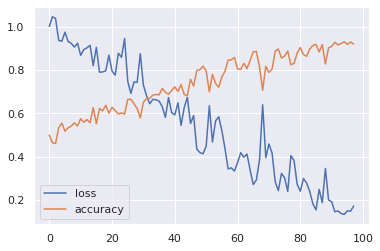

el epoch en el que obtuvo el mayor accuracy es: 96
modelo entrenado con 200 epochs tiene estas metricas: loss=0.38307514786720276 accuracy=0.8396226167678833


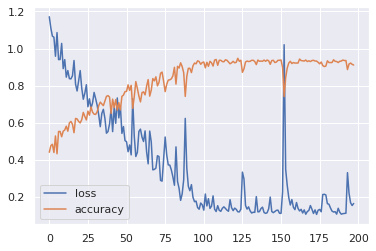

el epoch en el que obtuvo el mayor accuracy es: 124


In [ ]:
from tensorflow.keras.optimizers import Adam

nclasses = len(np.unique(y))

epochs = [20,50,100,200]

for epoch in epochs:
  modelo = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[X_train30.shape[1],]),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(256, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(nclasses, activation=tf.nn.softmax)
      ])
  modelo.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  historial = modelo.fit(X_train30, y_train30, epochs=epoch, batch_size=32,verbose=0)

  scores = modelo.evaluate(X_test30, y_test30,verbose=0)
  print(f"modelo entrenado con {epoch} epochs tiene estas metricas: loss={scores[0]} accuracy={scores[1]}")
  plt.plot(historial.history['loss'][2:], label="loss")
  plt.plot(historial.history['accuracy'][2:], label="accuracy")
  plt.legend()
  plt.show()
  print(f'el epoch en el que obtuvo el mayor accuracy es: {np.argmax(historial.history["accuracy"])}') 

In [ ]:
n = np.random.randint(0,y_test30.shape[0]+1)
print(f'la probabilidad de que la entrada del indice {n} sea cada una de las posibles salidas es: {modelo.predict(X_test30)[n]}')
result = np.argmax(modelo.predict(X_test30), axis=1)
print('(Predicción, Ground truth)')
result[n], y_test30[n]

la probabilidad de que la entrada del indice 61 sea cada una de las posibles salidas es: [2.4625114e-03 2.4710071e-06 9.9753499e-01]
(Predicción, Ground truth)


(2, 2.0)

##Particion 60-40

modelo entrenado con 20 epochs tiene estas metricas: loss=0.9189043641090393 accuracy=0.5825471878051758


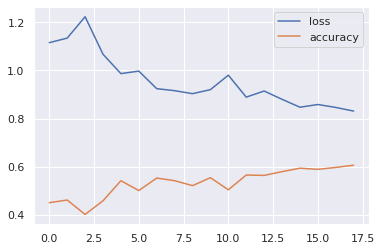

el mejor epoch es: 19
modelo entrenado con 50 epochs tiene estas metricas: loss=0.4965055286884308 accuracy=0.7358490824699402


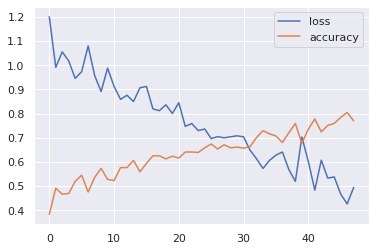

el mejor epoch es: 48
modelo entrenado con 100 epochs tiene estas metricas: loss=0.19245164096355438 accuracy=0.9245283007621765


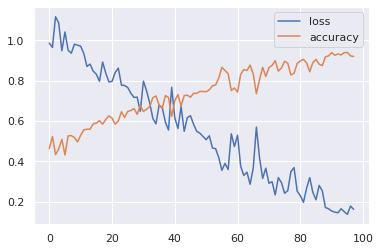

el mejor epoch es: 97
modelo entrenado con 200 epochs tiene estas metricas: loss=0.13502994179725647 accuracy=0.9245283007621765


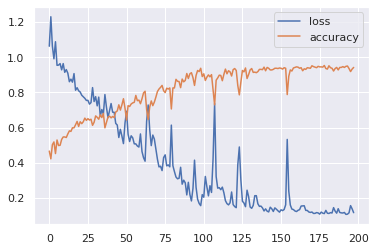

el mejor epoch es: 180


In [ ]:
from tensorflow.keras.optimizers import Adam

nclasses = len(np.unique(y))

epochs = [20,50,100,200]

for epoch in epochs:
  modelo = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[X_train40.shape[1],]),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(256, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(nclasses, activation=tf.nn.softmax)
      ])
  modelo.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  historial = modelo.fit(X_train40, y_train40, epochs=epoch, batch_size=32,verbose=0)

  scores = modelo.evaluate(X_test40, y_test40,verbose=0)
  print(f"modelo entrenado con {epoch} epochs tiene estas metricas: loss={scores[0]} accuracy={scores[1]}")
  plt.plot(historial.history['loss'][2:], label="loss")
  plt.plot(historial.history['accuracy'][2:], label="accuracy")
  plt.legend()
  plt.show()
  print(f'el mejor epoch es: {np.argmax(historial.history["accuracy"])}') 

In [ ]:
n = np.random.randint(0,y_test40.shape[0]+1)
print(f'la probabilidad de que la entrada del indice {n} sea cada una de las posibles salidas es: {modelo.predict(X_test40)[n]}')
result = np.argmax(modelo.predict(X_test40), axis=1)
print('(Predicción, Ground truth)')
result[n], y_test40[n]

la probabilidad de que la entrada del indice 10 sea cada una de las posibles salidas es: [0.00282122 0.42822078 0.56895804]
(Predicción, Ground truth)


(2, 2.0)